In [25]:
#Importing Important Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)

In [26]:
#Loading our Dataset
data = pd.read_csv('/kaggle/input/bengaluru-house-data/Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [27]:
#Viewing shape
data.shape

(13320, 9)

In [28]:
#Columns in the dataset
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [29]:
#Viewing unique area type
data['area_type'].unique()


array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [30]:
#Viewing the number of unique area_types
data['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [31]:
#Dropping unnecessary columns
data = data.drop(['area_type' , 'society', 'availability', 'balcony'] , axis = 'columns')
data.shape

(13320, 5)

In [32]:
#Viewing rows with missing values
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [33]:
#Dropping rows with missing values
data = data.dropna()

data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [34]:
data.shape

(13246, 5)

In [35]:
# unique values in Size column
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [36]:
#Creating a new column bhk
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))

In [37]:
#Viewing unique values of bhk
data['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [38]:
data[data['bhk']>10]

,location,size,total_sqft,bath,price,bhk
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


In [39]:
#Viewing unique values in total_sqft column
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [40]:
# Defining is_float function
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [41]:
data[~data['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [42]:
#Defining a function to convert the range values
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [43]:
#Checking convert_sqft_to_num function
convert_sqft_to_num('3067 - 8156')

5611.5

In [44]:
#Applying convert_sqft_to_num
data = data.copy()
data['total_sqft'] = data['total_sqft'].apply(convert_sqft_to_num)
data = data[data.total_sqft.notnull()]


In [45]:
#Creating Price Per square Feet Column
data['price_per_sqft'] = data['price']*100000 / data['total_sqft']
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [46]:
#Viewing the number of location datapoints 
data['location'] = data['location'].apply(lambda x : x.strip())
location_stats = data['location'].value_counts(ascending = False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [47]:
#Locations having less than or equal to 10 data points
location_stats_less_than_10 = location_stats[location_stats<= 10]
location_stats_less_than_10

location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [48]:
#location unique data points
len(data['location'].unique())

1287

In [49]:
#removing location data points less than or equal to 10
data['location'] = data['location'].apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
len(data['location'].unique())

241

In [50]:
#Describing price_per_sqft
data['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [51]:
#Min. area of 1 BHK is around 450-600sq.ft.
data = data[~(data['total_sqft'] / data['bhk'] < 450)]
data.shape

(10627, 7)

In [52]:
#Function for removing extreme values
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-sd)) & (subdf.price_per_sqft < (m+sd))]
        df_out = pd.concat([df_out , reduced_df] , ignore_index = True)
    return df_out
#Calling remove_pps_outliers 
data = remove_pps_outliers(data)
data.shape

(8534, 7)

Text(0, 0.5, 'Count')

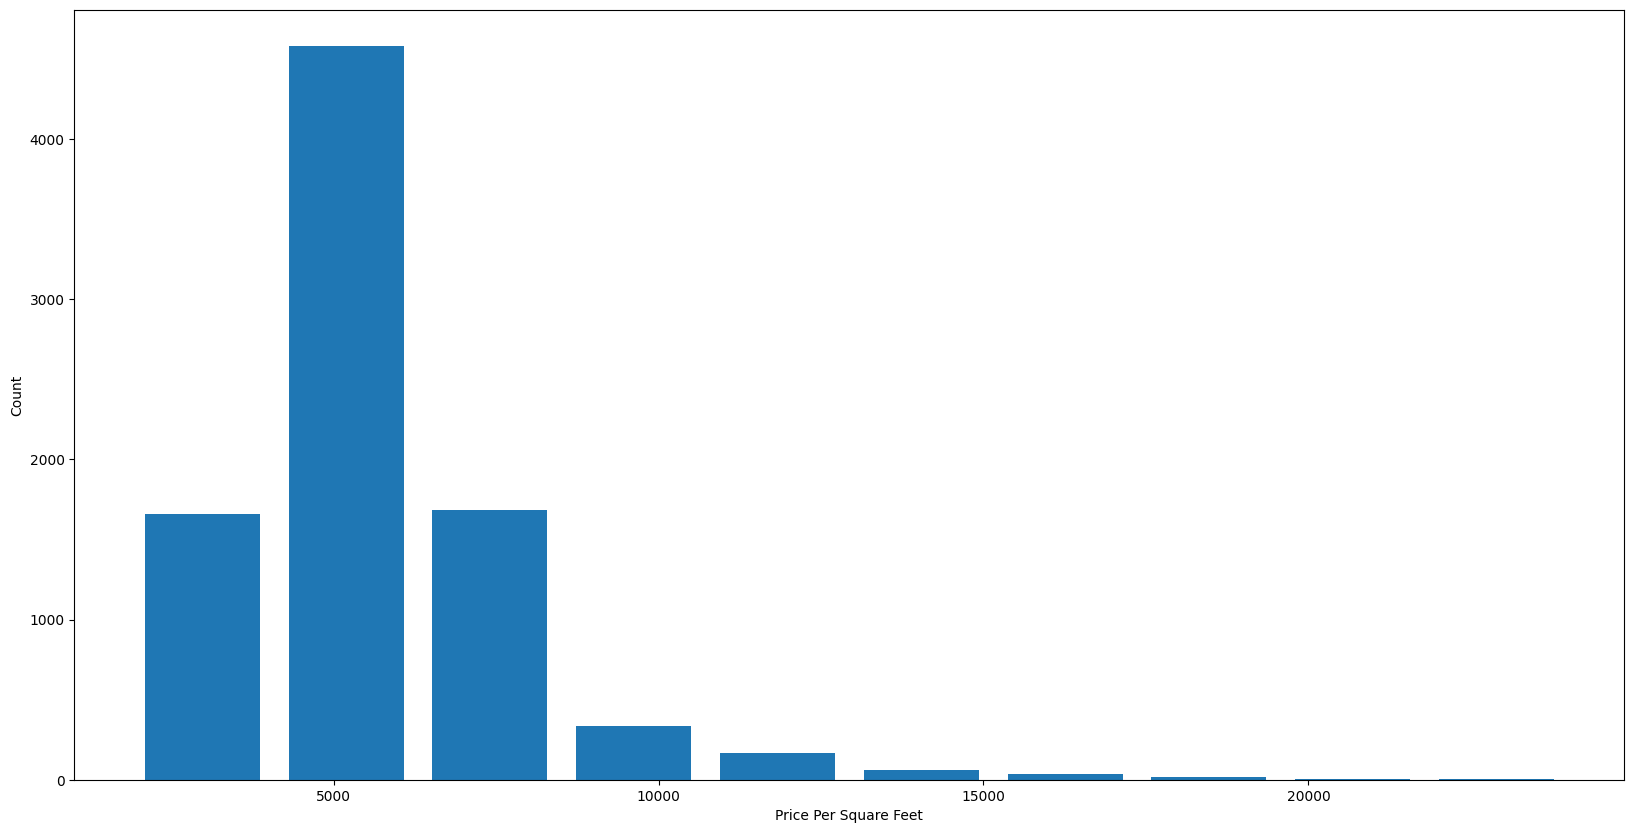

In [53]:
#Plotting a histogram of price_per_sqft
plt.hist(data.price_per_sqft , rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [54]:
# Creating remove_bhk_outliers
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk , bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>10:
                exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices , axis = 'index')
    

#Calling remove_bhk_outliers
data = remove_bhk_outliers(data)
data.shape

(6456, 7)

Text(0, 0.5, 'Count')

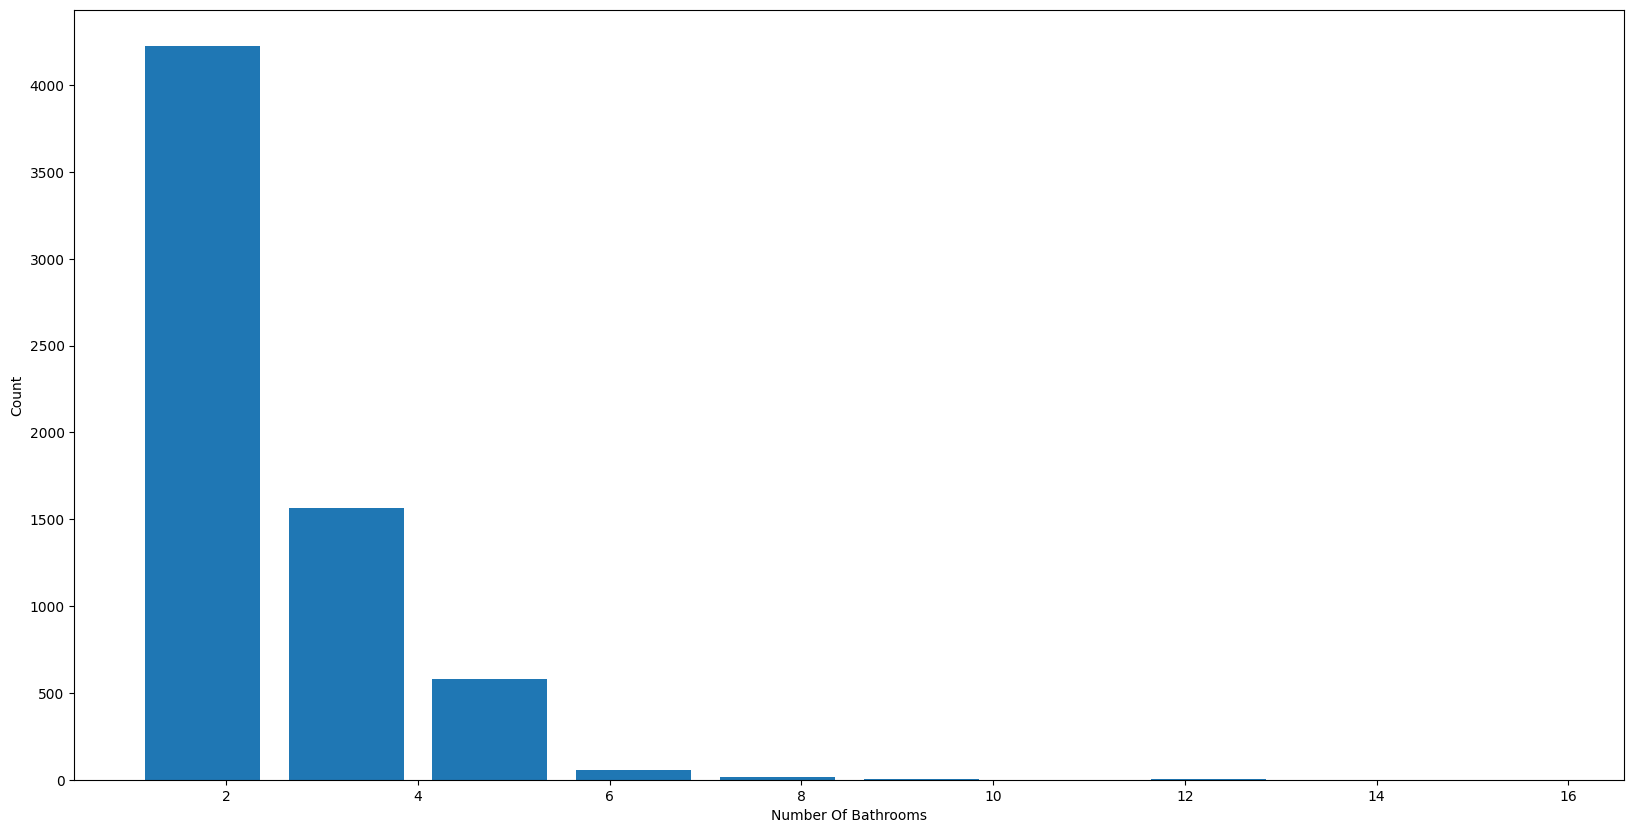

In [55]:
#Plotting a histogram showing bathrooms
plt.hist(data['bath'] , rwidth = 0.8)
plt.xlabel('Number Of Bathrooms')
plt.ylabel('Count')

In [56]:
#Viewing unique bathroom values
data['bath'].unique()

array([ 4.,  3.,  2.,  5.,  1.,  6.,  7.,  8.,  9., 12., 16.])

In [57]:
#Houses having baths 2 more than bhk are not feasible
data[data.bath > (data.bhk+2)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1295,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
4314,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5589,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
7055,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [58]:
#Removing unfeasible data
data = data[data.bath< data.bhk+2]
data.shape

(6385, 7)

In [59]:
#Dropping size and price_per_sqft
data = data.drop(['size' , 'price_per_sqft'] , axis = 'columns')
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1235.0,2.0,148.0,2
4,1st Block Jayanagar,2750.0,4.0,413.0,4


In [60]:
#One- hot encoding
dummies = pd.get_dummies(data['location'])
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
#Combining data and dummies
data = pd.concat([data , dummies.drop('other' , axis = 'columns')] , axis = 'columns')
data.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,2750.0,4.0,413.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
#Dropping location column
data = data.drop('location' , axis = 'columns')
data.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2750.0,4.0,413.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [63]:
#Dropping price column
X = data.drop('price' , axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2750.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
#Making a new DataFrame for price
y = data.price
y.head()

0    428.0
1    194.0
2    235.0
3    148.0
4    413.0
Name: price, dtype: float64

In [65]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 10)

In [66]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train , y_train)
reg.score(X_test,y_test)

0.8184505485889337